# How does Covid19 affect Citi Bike Ride Trend?
## by Eric Law Yuwei

## Investigation Overview

Citi Bike is New York City’s bike share system, and the largest in the nation. Citi Bike launched in May 2013 and has become an essential part of our transportation network. It's fun, efficient and affordable – not to mention healthy and good for the environment.

In this presentation, I will be showcasing the Citi Bike ride trend of year 2020 and how Covid19 pandemic affect the type of users and riders behavior.
## Dataset Overview


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')


plt.rcParams['font.family'] = "sans-serif"
color_palette_list = ['#009ACD', '#ADD8E6', '#63D1F4', '#0EBFE9', 
                      '#C1F0F6', '#0099CC']

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df1_clean=pd.read_csv('df1_clean')
df1_clean

,starttime,stoptime,start station name,start station latitude,start station longitude,end station name,end station latitude,end station longitude,usertype,birth year,gender,start_hour,start_date,start_day_week,start_month,year,tripduration_min,Age,distance
0,2020-01-01 00:04:50.192,2020-01-01 00:08:37.037,Grove St PATH,40.719586,-74.043117,Newark Ave,40.721525,-74.046305,Subscriber,1984,Female,0,2020-01-01,Wednesday,January,2020,3.766667,37,0.344533
1,2020-01-01 00:16:01.670,2020-01-01 00:22:19.080,Grove St PATH,40.719586,-74.043117,Brunswick & 6th,40.726012,-74.050389,Subscriber,1989,Female,0,2020-01-01,Wednesday,January,2020,6.283333,32,0.941573
2,2020-01-01 00:17:33.877,2020-01-01 00:22:22.442,Grove St PATH,40.719586,-74.043117,Brunswick & 6th,40.726012,-74.050389,Customer,1989,Male,0,2020-01-01,Wednesday,January,2020,4.800000,32,0.941573
3,2020-01-01 00:32:05.902,2020-01-01 00:39:21.066,Sip Ave,40.730897,-74.063913,Astor Place,40.719282,-74.071262,Customer,1969,Unknown,0,2020-01-01,Wednesday,January,2020,7.250000,52,1.432779
4,2020-01-01 00:46:19.678,2020-01-01 00:50:11.344,Grove St PATH,40.719586,-74.043117,Marin Light Rail,40.714584,-74.042817,Subscriber,1983,Female,0,2020-01-01,Wednesday,January,2020,3.850000,38,0.556957
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
276132,2020-12-31 22:38:25.468,2020-12-31 22:49:18.515,Grand St,40.715178,-74.037683,Grand St,40.715178,-74.037683,Subscriber,1980,Male,22,2020-12-31,Thursday,December,2020,10.883333,41,0.000000
276133,2020-12-31 23:07:44.003,2020-12-31 23:36:54.471,Newport Pkwy,40.728745,-74.032108,Newport Pkwy,40.728745,-74.032108,Customer,1969,Unknown,23,2020-12-31,Thursday,December,2020,29.166667,52,0.000000
276134,2020-12-31 23:31:09.462,2021-01-01 00:00:31.329,Sip Ave,40.730897,-74.063913,Jersey & 6th St,40.725289,-74.045572,Customer,1998,Male,23,2020-12-31,Thursday,December,2020,29.350000,23,1.667085
276135,2020-12-31 23:35:45.464,2020-12-31 23:46:22.730,Grand St,40.715178,-74.037683,Newport Pkwy,40.728745,-74.032108,Customer,1969,Unknown,23,2020-12-31,Thursday,December,2020,10.616667,52,1.580559


# **Visualization 1: Citibike Gender & User Types**
Based on the figure below, there are more male subscribers than female subscribers. Majority of the bike users are subscribers which representing 74.1% 

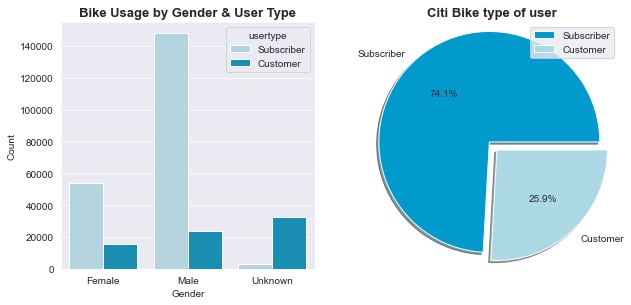

In [39]:
plt.figure(figsize=(10,10))

plt.subplot(2,2,1)
sns.countplot(data=df1_clean, x='gender', hue='usertype', palette=['#ADD8E6','#009ACD'])
plt.ylabel('Count')
plt.xlabel('Gender')
plt.title("Bike Usage by Gender & User Type", fontsize=13,fontweight='bold');

plt.subplot(2,2,2)
usertype_=df1_clean['usertype'].value_counts()
plt.rcParams['font.family'] = "sans-serif"
color_palette_list = ['#009ACD', '#ADD8E6', '#63D1F4']
label = ['Subscriber','Customer']
plt.pie(usertype_,labels=label,radius=1,autopct='%0.1f%%',shadow=True,explode=[0,0.1],colors=color_palette_list)
plt.axis('equal')
plt.title('Citi Bike type of user',fontsize=13,fontweight='bold')
plt.legend()
plt.show()

# Visualization 2: Citibike monthly usage based on user types

According to the figure below, we observed that both customer and subscriber have the lowest bike usage on April. This is because the government in New York City responsed to the Covid 19 pandemic with a full lockdown from March 2020 to April 2020, followed by a four-phase reopening plan by region from April 2020 to July 2020. On the other hand, customer trends is corresponded with subscribers as both shows similar pattern.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

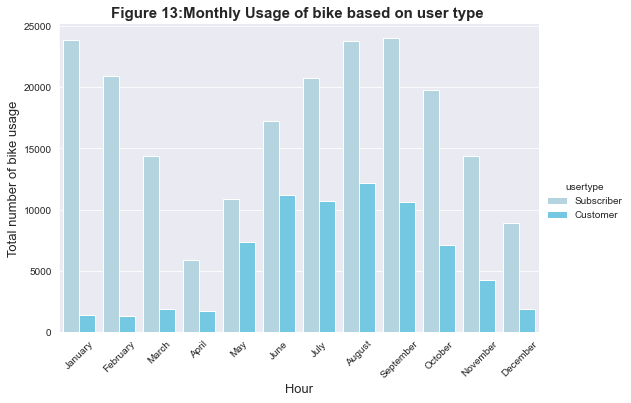

In [42]:
sns.catplot(data = df1_clean, x='start_month',hue='usertype' ,kind='count',palette=['#ADD8E6','#63D1F4'],aspect= 1.5);
plt.title("Figure 13:Monthly Usage of bike based on user type ",fontsize=15, fontweight='bold')
plt.xlabel("Hour",fontsize=13)
plt.ylabel("Total number of bike usage",fontsize=13)
plt.xticks(rotation=45)

## Visualization 3: Bike hourly usage based on user type

Based on the first figure below, subscriber users peak out at 6pm during the weekday. Another small peaks which was at 8am during the morning rush hour. There is a consistent pattern from here in which the bikes are primarily  for commuters. Customers ride behavior pattern on the weekday does not correspond with subscribers as the trend increases untill 6pm and decreases after 6pm.

For second figure, both subscriber and customer show similar trend in which majority of the usage are for leisure and entertainment purpose.


Text(13.059560185185184, 0.5, 'Total number of bike usage')

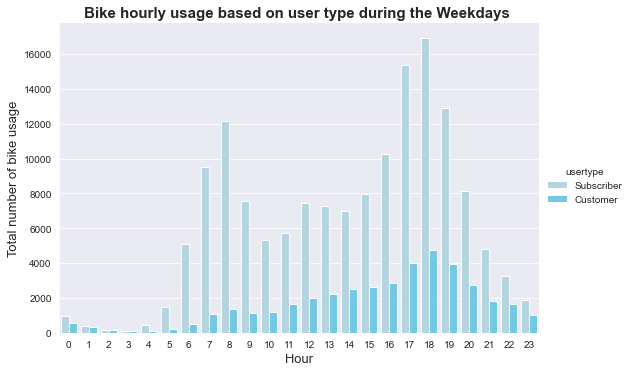

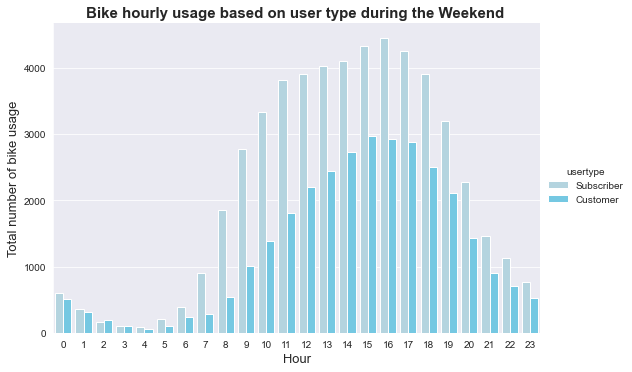

In [55]:
Weekday = df1_clean.query('start_day_week in ["Monday" , "Tuesday" , "Wednesday","Thursday","Friday"]' )
Weekend = df1_clean.query('start_day_week in ["Saturday" , "Sunday"]')

plt.rcParams['font.family'] = "sans-serif"
sns.catplot(data = Weekday, x='start_hour',hue='usertype' ,kind='count',palette=['#ADD8E6','#63D1F4'],aspect= 1.5);
plt.title("Bike hourly usage based on user type during the Weekdays ",fontsize=15, fontweight='bold')
plt.xlabel("Hour",fontsize=13)
plt.ylabel("Total number of bike usage",fontsize=13)

plt.rcParams['font.family'] = "sans-serif"
sns.catplot(data = Weekend, x='start_hour',hue='usertype' ,kind='count',palette=['#ADD8E6','#63D1F4'],aspect= 1.5);
plt.title("Bike hourly usage based on user type during the Weekend ",fontsize=15, fontweight='bold')
plt.xlabel("Hour",fontsize=13)
plt.ylabel("Total number of bike usage",fontsize=13)

# Visualization 4: Multivariate Exploration with Heatmap

Customer trip takes longer comparing to subscriber group. This is because they prefer bike rides over the weekends and which indicates they are possibly use for leisure and entertainment. 
According to the Subscribers usage behavior pattern, they are mainly commute to work on the weekdays. However, customers tend to use more during the weekend.



Text(70.0, 0.5, 'Day of Week')

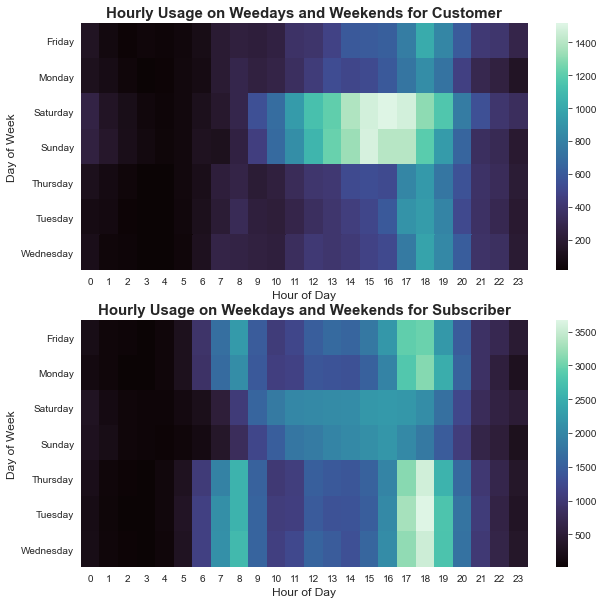

In [67]:
plt.figure(figsize=(10,10))

plt.subplot(2, 1, 1)
customers = df1_clean.query('usertype == "Customer"')
customer_group = customers.groupby(['start_day_week', 'start_hour']).size()
customer_counts = customer_group.reset_index(name='count')
customer_counts = customer_counts.pivot(index='start_day_week', columns='start_hour', values='count')
sns.heatmap(customer_counts, cmap='mako')
plt.xlabel('Hour of Day',fontsize=12)
plt.ylabel('Day of Week',fontsize=12)
plt.title('Hourly Usage on Weedays and Weekends for Customer',fontweight='bold',fontsize=15);

plt.subplot(2, 1, 2)
subscribers = df1_clean.query('usertype == "Subscriber"')
subscriber_group = subscribers.groupby(['start_day_week', 'start_hour'],sort=False).size()
subscriber_counts = subscriber_group.reset_index(name='count')
subscriber_counts = subscriber_counts.pivot(index='start_day_week', columns='start_hour', values='count')
sns.heatmap(subscriber_counts, cmap='mako')
plt.title('Hourly Usage on Weekdays and Weekends for Subscriber',fontsize=15,fontweight='bold')
plt.xlabel('Hour of Day',fontsize=12)
plt.ylabel('Day of Week',fontsize=12)


# **Summary**
- By comparing with previous dataset, year 2020 obviously has less bike users compare with any other years due to Covid 19 Pandemic
- There are two type of users which are Subscriber and Customer. Subscriber which majority are male gender representing 74.1% and customer holds 25.9%.
- The average age bike user is between 30-35
- The most popular place to rent bike is Grove St Path , and least popular place is JCBS Depot.
- Subscribers are mainly commuters. Bike usage peaks at 8am and 5-6pm daily on the weekdays. 
- Both user ride behavior are show similar pattern in the weekend
- Saturday is the most popular day for bike usage in 2020 which more than 40k trip made by users
- April has the lowest bike usage as the government in New York City responsed to the Covid 19 pandemic with a full lockdown from March 2020 to April 2020, followed by a four-phase reopening plan by region from April 2020 to July 2020.
 